In [1]:
import numpy as np
import torch
import torch.autograd as autograd
import matplotlib.pyplot as plt

In [2]:
np.random.seed(45)
num_samples = 40
    
# Generate data
x1 = np.random.uniform(-1, 1, num_samples)
f_x = 3*x1 + 4
eps = np.random.randn(num_samples)
y = f_x + eps

x = torch.tensor(x1, requires_grad=True)
ytensor = torch.tensor(y, requires_grad=True)

theta0 = torch.tensor(0.0, requires_grad=True)
theta1 = torch.tensor(0.0, requires_grad=True)

ypred = theta0 + theta1 * x
mseloss = ((ytensor-ypred)**2).mean()
grad = autograd.grad(mseloss, [theta0,theta1])

print(f"Gradient wrt theta0: {grad[0]}")
print(f"Gradient wrt theta1: {grad[1]}")

Gradient wrt theta0: -7.447053909301758
Gradient wrt theta1: -1.0253016948699951


In [3]:
import numpy as np

X = np.vstack([np.ones(len(x1)), x1]).T  # Add bias term (ones for theta_0)
theta_exact = np.linalg.inv(X.T @ X) @ X.T @ y
print(f"Exact theta0: {theta_exact[0]}, Exact theta1: {theta_exact[1]}")
minloss = ((ytensor-theta_exact[0]-theta_exact[1]*x)**2).mean()

Exact theta0: 3.9507064023194527, Exact theta1: 2.6824689259670587


In [4]:
theta0_sgd = (-2*(ytensor-ypred)).mean()
theta1_sgd = 0
for i in range(len(x)):
    theta1_sgd -= 2*x[i]*(ytensor[i]-ypred[i])
theta1_sgd/=len(x)
print(f"Gradient wrt theta0: {theta0_sgd}")
print(f"Gradient wrt theta1: {theta1_sgd}")

Gradient wrt theta0: -7.447053920097924
Gradient wrt theta1: -1.0253017532346633


In [5]:
print(f"Difference between gradient of Theta0 obtained by SGD and Autograd is {abs(theta0_sgd-grad[0])}")
print(f"Difference between gradient of Theta1 obtained by SGD and Autograd is {abs(theta1_sgd-grad[1])}")

Difference between gradient of Theta0 obtained by SGD and Autograd is 1.0796166627358161e-08
Difference between gradient of Theta1 obtained by SGD and Autograd is 5.836466820952069e-08


As we can see the difference between the values obtained by Stochastic Gradient Descent and True Gradient is very small. Therefore we can conclude SGD is good estimate of True Gradient.

Theta0 for minimum loss function is: 3.9438157413119144
Theta1 for minimum loss function is: 2.6260127061823972


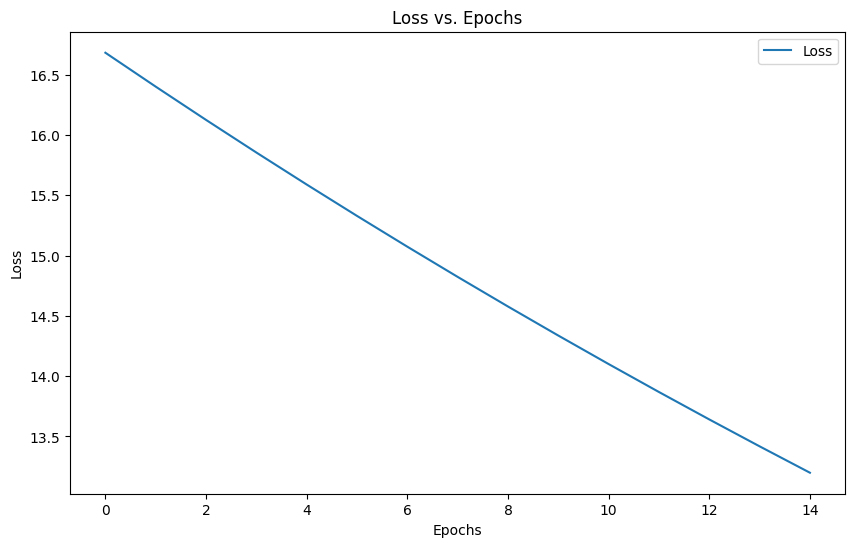

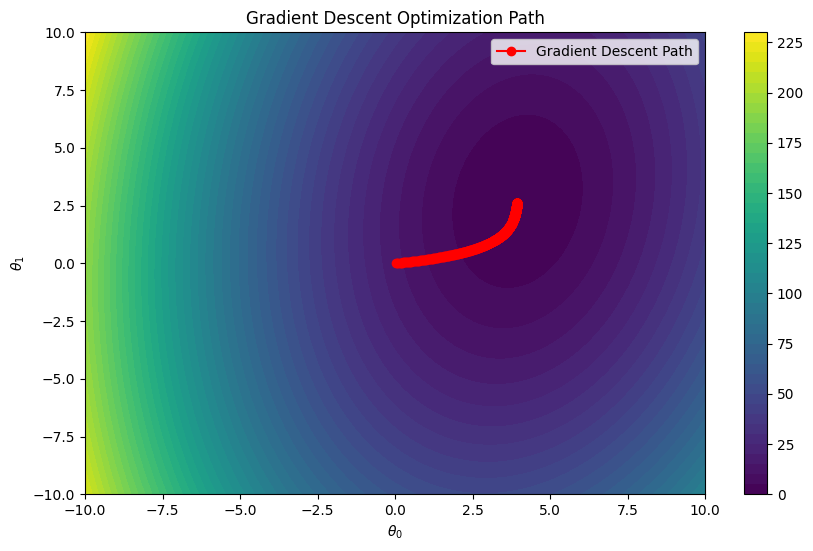

In [7]:
ytensor = ytensor.detach().numpy()
x = x.detach().numpy()
theta0_fgd = 0
theta1_fgd = 0
lr = 0.01
theta0_vals = []
theta1_vals = []
loss_vals = []
for i in range(2000):
    ypred = theta0_fgd + theta1_fgd * x
    theta0_fgd -= -lr*(sum(ytensor-ypred))/len(x)
    theta1_fgd -= -lr*(sum((ytensor-ypred)*x))/len(x)
    theta0_vals.append(theta0_fgd)
    theta1_vals.append(theta1_fgd)
    loss_vals.append(((ytensor - ypred) ** 2).mean())
    if abs(minloss - ((ytensor-ypred)**2).mean()) <0.001:
        break
print(f"Theta0 for minimum loss function is: {theta0_fgd}")
print(f"Theta1 for minimum loss function is: {theta1_fgd}")

plt.figure(figsize=(10, 6))
plt.plot(range(15), loss_vals[0:15], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

theta0_range = np.linspace(-10, 10, 100)
theta1_range = np.linspace(-10, 10, 100)
T0, T1 = np.meshgrid(theta0_range, theta1_range)
Z = np.zeros_like(T0)
for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        y_pred = T0[i, j] + T1[i, j] * x
        Z[i, j] = ((ytensor - y_pred) ** 2).mean()

plt.figure(figsize=(10, 6))
plt.contourf(T0, T1, Z, levels=50, cmap='viridis')
plt.colorbar()
plt.plot(theta0_vals, theta1_vals, 'ro-', label='Gradient Descent Path')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Gradient Descent Optimization Path')
plt.legend()
plt.show()

Theta0 for minimum loss function is: 3.894577873929604
Theta1 for minimum loss function is: 2.1980378553706643


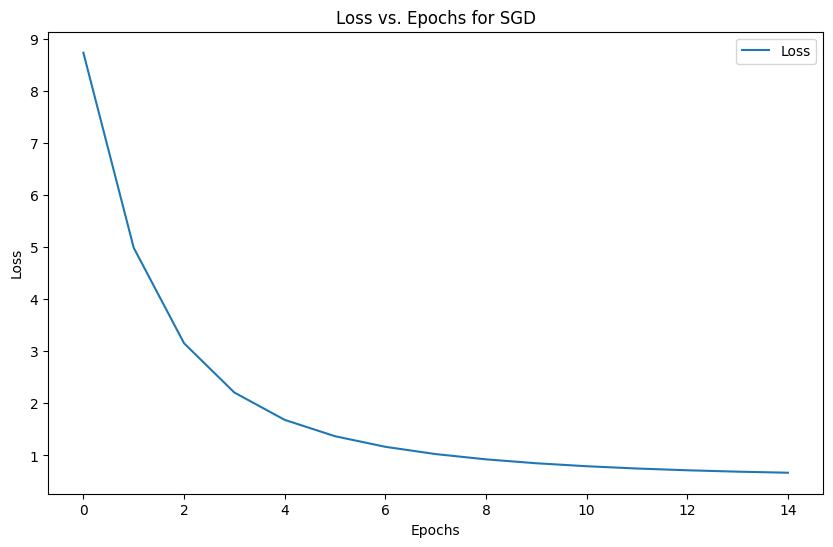

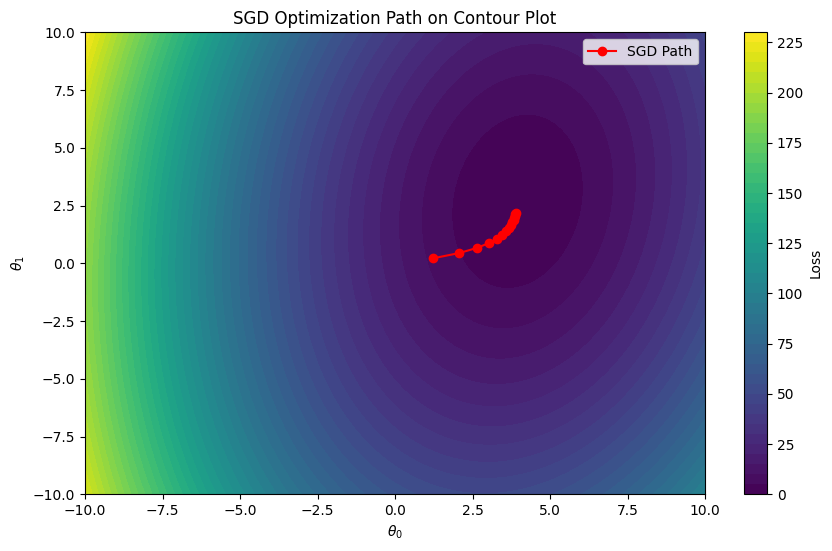

In [8]:
theta0_sgd = 0
theta1_sgd = 0
theta0_vals = []
theta1_vals = []  
loss_vals = []
for epoch in range(15):
    for i in range(len(x)):
        ypred = theta0_sgd + theta1_sgd * x[i]
        theta0_sgd -= -lr*(ytensor[i]-ypred)
        theta1_sgd -= -lr*((ytensor[i]-ypred)*x[i])
    loss = ((ytensor - theta0_sgd-theta1_sgd*x) ** 2).mean()
    loss_vals.append(loss)
    theta0_vals.append(theta0_sgd)
    theta1_vals.append(theta1_sgd)
    if loss < 0.001:
        break
print(f"Theta0 for minimum loss function is: {theta0_sgd}")
print(f"Theta1 for minimum loss function is: {theta1_sgd}")

plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_vals)), loss_vals, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for SGD')
plt.legend()
plt.show()


theta0_range = np.linspace(-10, 10, 100)
theta1_range = np.linspace(-10, 10, 100)
T0, T1 = np.meshgrid(theta0_range, theta1_range)
Z = np.zeros_like(T0)


for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        y_pred = T0[i, j] + T1[i, j] * x
        Z[i, j] = ((ytensor - y_pred) ** 2).mean()


plt.figure(figsize=(10, 6))
plt.contourf(T0, T1, Z, levels=50, cmap='viridis')
plt.colorbar(label='Loss')
plt.plot(theta0_vals, theta1_vals, 'ro-', label='SGD Path')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('SGD Optimization Path on Contour Plot')
plt.legend()
plt.show()

Theta0 for minimum loss function is: 3.7789962215192703
Theta1 for minimum loss function is: 1.776540654967491


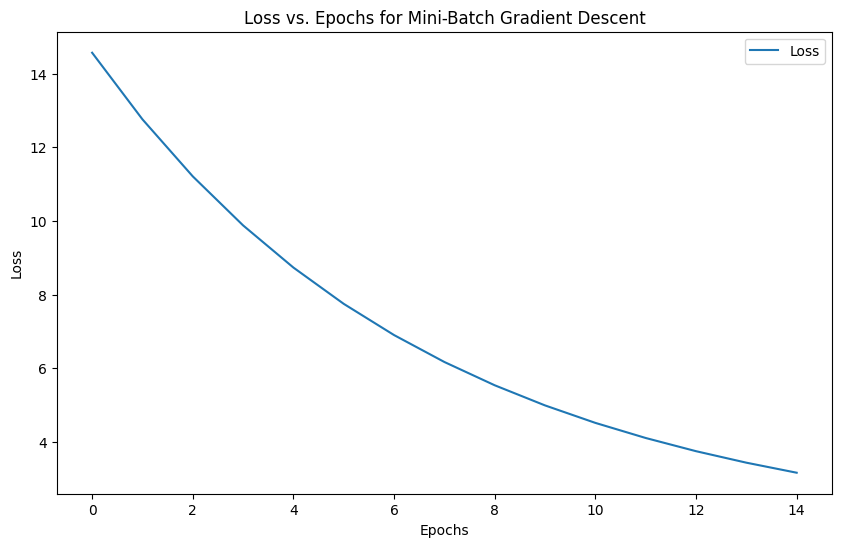

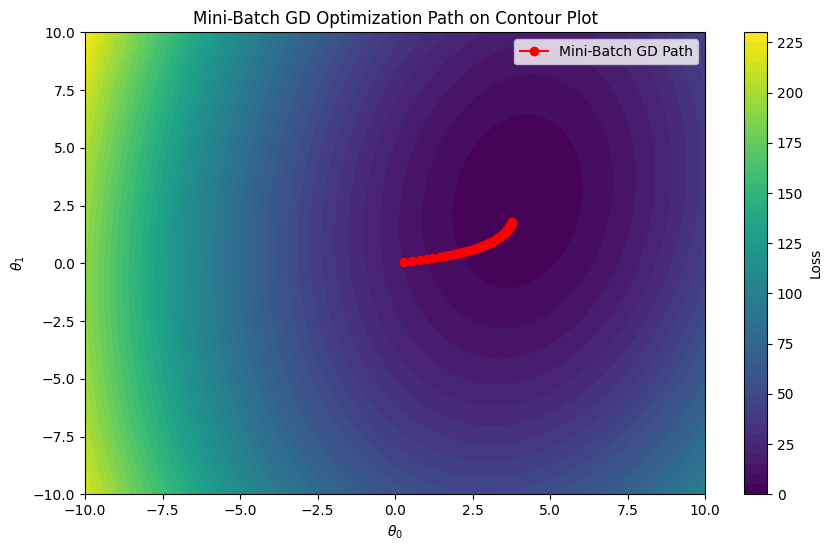

In [74]:
theta0_mbgd = 0
theta1_mbgd = 0  
batch_size = 10
theta0_vals = []
theta1_vals = []  
loss_vals = []

for epoch in range(50):
    shuffled_indices = np.random.permutation(len(x))
    x_shuffled = x[shuffled_indices]
    y_shuffled = ytensor[shuffled_indices]   
    for i in range(0, len(x), batch_size):
        x_batch = x_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]
        ypred_batch = theta0_mbgd + theta1_mbgd * x_batch
        theta0_mbgd += 2*lr*(sum(y_batch - ypred_batch))/len(x_batch)
        theta1_mbgd += 2*lr*(sum((y_batch - ypred_batch)*x_batch)/len(x_batch))
    loss = ((ytensor - theta0_mbgd - theta1_mbgd*x) ** 2).mean()  #total
    loss_vals.append(loss)
    theta0_vals.append(theta0_mbgd)
    theta1_vals.append(theta1_mbgd)
    if loss < 0.001:
        break
print(f"Theta0 for minimum loss function is: {theta0_mbgd}")
print(f"Theta1 for minimum loss function is: {theta1_mbgd}")


plt.figure(figsize=(10, 6))
plt.plot(range(15), loss_vals[0:15], label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for Mini-Batch Gradient Descent')
plt.legend()
plt.show()


theta0_range = np.linspace(-10, 10, 100)
theta1_range = np.linspace(-10, 10, 100)
T0, T1 = np.meshgrid(theta0_range, theta1_range)
Z = np.zeros_like(T0)


for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        y_pred = T0[i, j] + T1[i, j] * x
        Z[i, j] = ((ytensor - y_pred) ** 2).mean()


plt.figure(figsize=(10, 6))
plt.contourf(T0, T1, Z, levels=50, cmap='viridis')
plt.colorbar(label='Loss')
plt.plot(theta0_vals, theta1_vals, 'ro-', label='Mini-Batch GD Path')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Mini-Batch GD Optimization Path on Contour Plot')
plt.legend()
plt.show()
    
    


Theta0 for minimum loss function is: 0.563851024277832
Theta1 for minimum loss function is: 0.0813730333619906


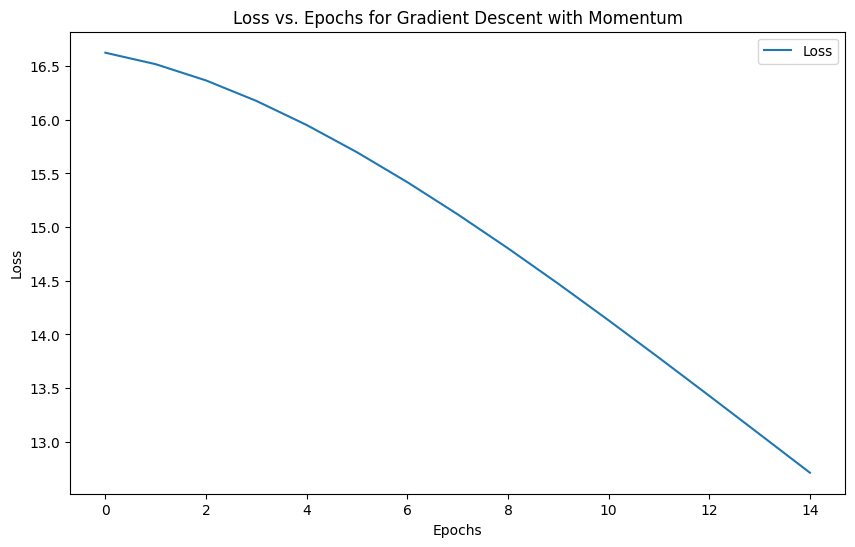

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


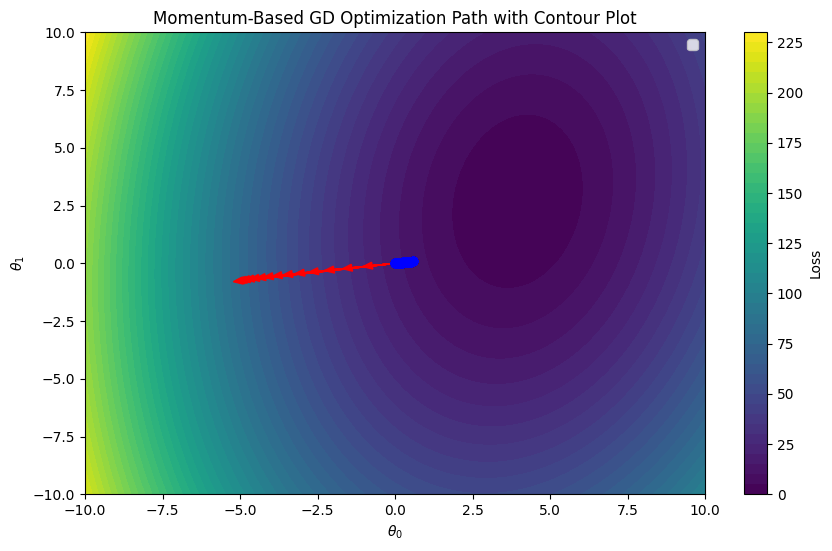

In [76]:
# Gradient Descent with Momentum Variables
theta0_momentum = 0  # Initial theta0
theta1_momentum = 0  # Initial theta1
v0 = 0  # Momentum for theta0
v1 = 0  # Momentum for theta1
beta = 0.9  # Momentum factor
lr = 0.01  # Learning rate
epochs = 15  # Number of epochs
epsilon = 0.001  # Convergence criteria

# Lists to store values for visualization
theta0_vals = []
theta1_vals = []
momentum_vals = []
loss_vals = []

# Gradient Descent with Momentum
for epoch in range(epochs):
    ypred = theta0_momentum + theta1_momentum * x
    gradient0 = -(2 / len(x)) * sum(ytensor - ypred)
    gradient1 = -(2 / len(x)) * sum((ytensor - ypred) * x)
    
    # Update momentum
    v0 = beta * v0 + (1 - beta) * gradient0
    v1 = beta * v1 + (1 - beta) * gradient1
    
    # Update parameters
    theta0_momentum -= lr * v0
    theta1_momentum -= lr * v1
    
    # Calculate and store loss
    loss = ((ytensor - (theta0_momentum + theta1_momentum * x)) ** 2).mean()
    loss_vals.append(loss)
    
    # Store values for visualization
    theta0_vals.append(theta0_momentum)
    theta1_vals.append(theta1_momentum)
    momentum_vals.append((v0, v1))
    
    # Check for convergence
    if loss < epsilon:
        print(f"Converged in {epoch + 1} epochs")
        break

# Final values after Gradient Descent with Momentum
print(f"Theta0 for minimum loss function is: {theta0_momentum}")
print(f"Theta1 for minimum loss function is: {theta1_momentum}")

# Plot Loss vs. Epochs for Momentum-based GD
plt.figure(figsize=(10, 6))
plt.plot(range(len(loss_vals)), loss_vals, label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs for Gradient Descent with Momentum')
plt.legend()
plt.show()

# Contour Plot Setup for Visualizing the Optimization Path
theta0_range = np.linspace(-10, 10, 100)
theta1_range = np.linspace(-10, 10, 100)
T0, T1 = np.meshgrid(theta0_range, theta1_range)
Z = np.zeros_like(T0)

# Compute the loss for each combination of theta0 and theta1
for i in range(len(theta0_range)):
    for j in range(len(theta1_range)):
        y_pred = T0[i, j] + T1[i, j] * x
        Z[i, j] = ((ytensor - y_pred) ** 2).mean()

# Plot the contour with the optimization path
plt.figure(figsize=(10, 6))
plt.contourf(T0, T1, Z, levels=50, cmap='viridis')
plt.colorbar(label='Loss')

# Show momentum vectors at each epoch
for i in range(len(theta0_vals)):
    plt.arrow(theta0_vals[i], theta1_vals[i], momentum_vals[i][0], momentum_vals[i][1], 
              color='r', head_width=0.3, head_length=0.3)
    plt.plot(theta0_vals, theta1_vals, 'bo-')

plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.title('Momentum-Based GD Optimization Path with Contour Plot')
plt.legend()
plt.show()
